## Visualization for EXstream

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from segmentation import mapping, calculate_class_entropy, select_segment, calculate_segment_entropy, calculate_segment_penalty
from entropy_reward import calculate_D, aggreate_reward, combine_data, drop_features

if __name__ == '__main__':
    ## read cleaned data
    data = pd.read_csv('~/cs645_project/data/clean/batch146_17_clean.csv')
    # read index data
    index_data = pd.read_csv('~/cs645_project/data/truth/batch146_17_truth.csv')

    ## map index data and calculate class entropy
    index_data_mapped = mapping(index_data)
    index_data_class_entropy = calculate_class_entropy(index_data_mapped)

    ## calculate segment entropy
    filtered_data = select_segment(data, index_data_class_entropy)
    data_segment_entropy = calculate_segment_entropy(filtered_data)

    ## 6x1 class entropy:
    h_class = index_data_class_entropy['h_class']
    ## 6x19 class entropy:
    h_segment = data_segment_entropy

    # numpy array len(anomalies) x len(features)
    distance = calculate_D(h_segment, h_class)
    # adding reward for different features
    # numpy array len(feature) x 1
    aggregated_distance = aggreate_reward(distance)
    # convert the list of data frames to one data
    aggregated_data = combine_data(filtered_data)
    #list of all the features
    features_list = data_segment_entropy.columns
    Exstream_feature, Exstream_data = drop_features(aggregated_distance, aggregated_data, features_list)

Calculating segment entropy  1  of  6
Calculating segment entropy  2  of  6
Calculating segment entropy  3  of  6
Calculating segment entropy  4  of  6
Calculating segment entropy  5  of  6
Calculating segment entropy  6  of  6


In [43]:
from clustering import remove_correlated_features
clean_exstream = remove_correlated_features(Exstream_data, Exstream_feature, features_list, aggregated_distance)

No handles with labels found to put in legend.


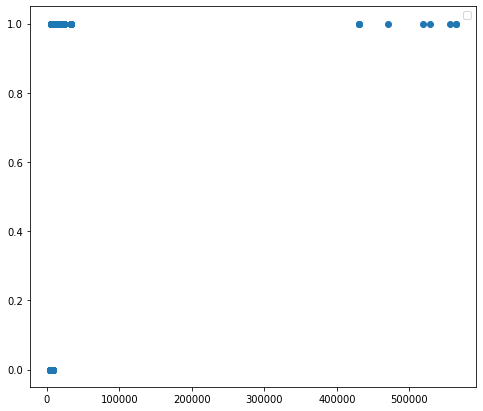

In [44]:
x = clean_exstream.iloc[:, 0]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
plt.legend()
plt.show()

No handles with labels found to put in legend.


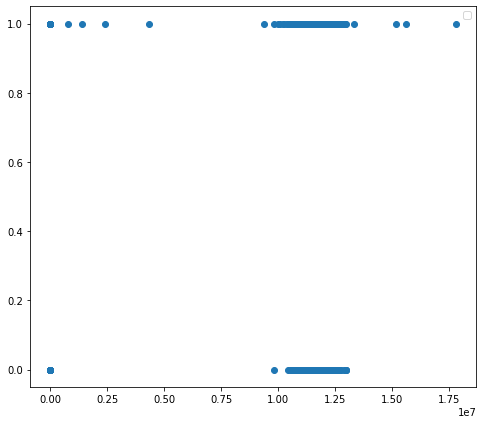

In [45]:
x = clean_exstream.iloc[:, 1]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
plt.legend()
plt.show()

No handles with labels found to put in legend.


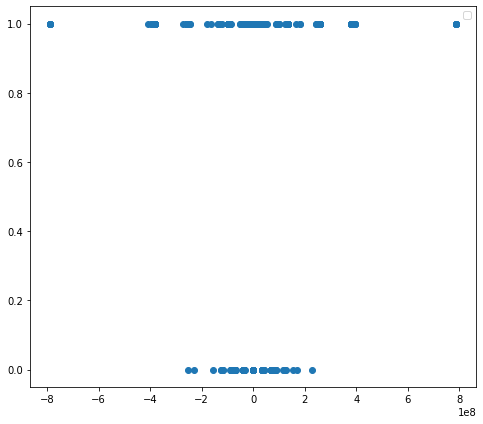

In [46]:
x = clean_exstream.iloc[:, 2]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
plt.legend()
plt.show()


No handles with labels found to put in legend.


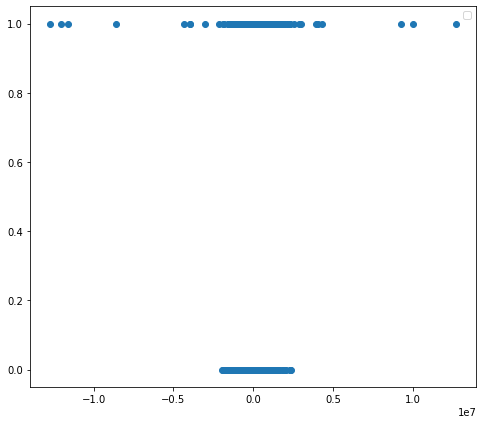

In [47]:
x = clean_exstream.iloc[:, 3]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
plt.legend()
plt.show()


No handles with labels found to put in legend.


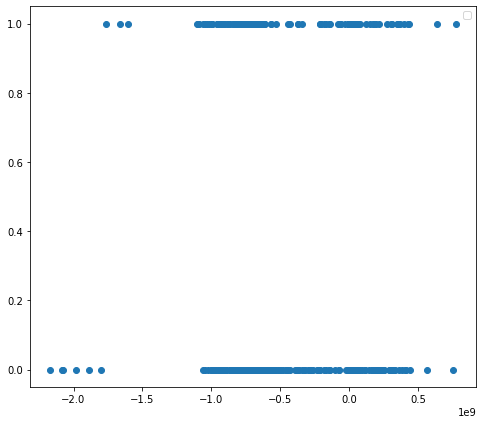

In [48]:
x = clean_exstream.iloc[:, 4]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
plt.legend()
plt.show()


No handles with labels found to put in legend.


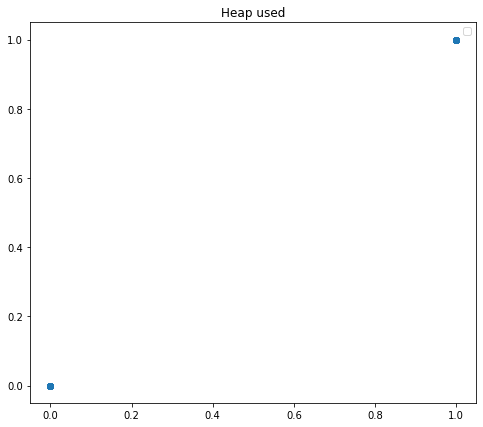

In [49]:
x = clean_exstream.iloc[:, 5]
y = clean_exstream.iloc[:, -1]
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y)
ax.set_title('Heap used')
plt.legend()
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
X_train = clean_exstream.iloc[:, 0:5]
y_train = clean_exstream.iloc[:, -1]
feature_cols=X_train.columns
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 7726.00
|   |--- feature_0 <= 6733.50
|   |   |--- feature_0 <= 5982.50
|   |   |   |--- feature_0 <= 5971.00
|   |   |   |   |--- feature_0 <= 5952.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  5952.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  5971.00
|   |   |   |   |--- feature_0 <= 5972.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5972.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  5982.50
|   |   |   |--- feature_0 <= 6085.50
|   |   |   |   |--- feature_0 <= 6026.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  6026.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6085.50
|   |   |   |   |--- feature_0 <= 6202.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  6202.00
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  6733.50
|   |   |--- feature_0 <= 7197.00
|   |   |   |--- feature_0 <= 6758.50
|   |   |   | 

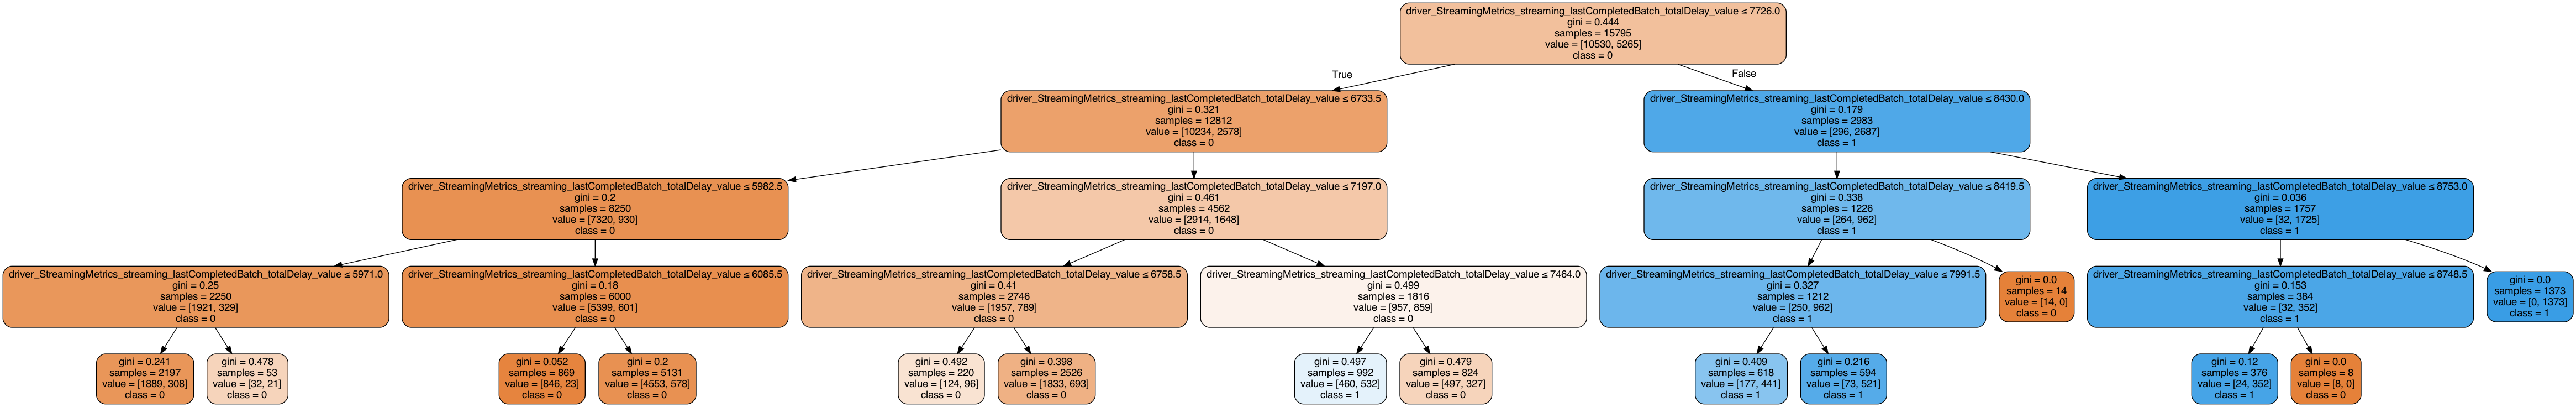

In [51]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('exstream.png')
Image(graph.create_png())